##Problem 1##

Shallow Network Training Started (SGD)...
Epoch [15/150], Loss: 4.7134
Epoch [30/150], Loss: 4.6016
Epoch [45/150], Loss: 4.5371
Epoch [60/150], Loss: 4.4779
Epoch [75/150], Loss: 4.4412
Epoch [90/150], Loss: 4.4581
Epoch [105/150], Loss: 4.4558
Epoch [120/150], Loss: 4.4192
Epoch [135/150], Loss: 4.4348
Epoch [150/150], Loss: 4.4151
Final Loss: 4.4151


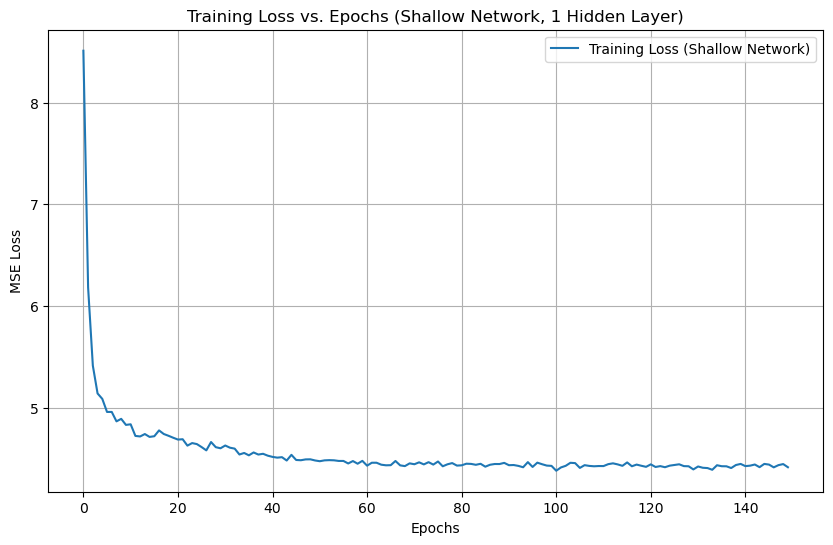

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 랜덤시드 부여 (재현성 확보)
np.random.seed(42)
# --- 1. 데이터 전처리 함수 (StandardScaler 사용) ---
def load_and_preprocess_data(filepath):
    df = pd.read_csv(filepath)

    # Target(Age)과 Feature(Age 제외) 분리
    y = df['Age'].values.reshape(-1, 1)
    X = df.drop('Age', axis=1)

    # One-hot Encoding for 'Sex'
    X = pd.get_dummies(X, columns=['Sex'], drop_first=False)

    # Standardization (StandardScaler 사용)
    X_values = X.values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_values)

    return X_scaled, y

# --- 2. 활성화 함수 정의 ---
def relu(z):
    return np.maximum(0, z)

# --- ReLU의 미분 함수 ---
def relu_derivative(z):
    return (z > 0).astype(float)

# --- 3. ShallowNN 클래스 구현 (1 Hidden Layer) ---
class ShallowNN:
    def __init__(self, input_size, hidden_size=3, learning_rate=0.001):
        self.lr = learning_rate
        D = input_size
        H = hidden_size

        # He Initialization for weights and zeros for biases(Relu 사용 시 적합하므로)
        self.Omega0 = np.random.randn(H, D) * np.sqrt(2. / D)
        self.beta0 = np.zeros((H, 1))
        self.Omega1 = np.random.randn(1, H) * np.sqrt(2. / H)
        self.beta1 = np.zeros((1, 1))

        self.grads = {}

    def forward(self, x):
        # x shape: (D, 1)
        self.z1 = np.dot(self.Omega0, x) + self.beta0
        self.h1 = relu(self.z1)
        self.y_hat = np.dot(self.Omega1, self.h1) + self.beta1
        return self.y_hat

    def compute_loss(self, y_hat, y):
        # MSE Loss: (y_hat - y)^2으로 N=1로 생각하여 계산
        return np.mean((y_hat - y) ** 2)

    def backward(self, x, y, y_hat):
        # 0. Initial Gradient (dL/dy_hat)
        dy_hat = 2 * (y_hat - y)

        # 1. Output Layer Gradients (Omega1, beta1)
        # dL/dOmega1 = dy_hat * h1.T
        dOmega1 = np.dot(dy_hat, self.h1.T)
        dbeta1 = dy_hat

        # 2. Hidden Layer Gradients (Omega0, beta0)
        # Error signal delta1: (dL/dy_hat * d_y_hat/dh1) * ReLU'(z1)
        # d_y_hat/dh1 = Omega1.T

        # dy_hat * Omega1.T
        delta1_error = np.dot(self.Omega1.T, dy_hat)
        # delta1_error * ReLU'(z1) (element-wise)
        delta1 = delta1_error * relu_derivative(self.z1)

        # dL/dOmega0 = delta1 * x.T
        dOmega0 = np.dot(delta1, x.T)
        dbeta0 = delta1

        self.grads = {
            'Omega1': dOmega1, 'beta1': dbeta1,
            'Omega0': dOmega0, 'beta0': dbeta0
        }

    def step(self):
        # Update parameters (SGD)
        self.Omega1 -= self.lr * self.grads['Omega1']
        self.beta1 -= self.lr * self.grads['beta1']
        self.Omega0 -= self.lr * self.grads['Omega0']
        self.beta0 -= self.lr * self.grads['beta0']

# --- 4. 학습 실행 ---
X, y = load_and_preprocess_data('/Users/lavi/MLDL_25_2_ASSIGNMENT/ASSIGNMENT_3/Data/CrabAge.csv')

input_dim = X.shape[1]
epochs = 150
learning_rate = 0.001 # 안정적인 학습을 위해 보편적인 0.001 사용

model = ShallowNN(input_size=input_dim, hidden_size=3, learning_rate=learning_rate)

loss_history = []
N = X.shape[0]

print("Shallow Network Training Started (SGD)...")
for epoch in range(epochs):
    epoch_loss = 0

    # Shuffle indices for SGD(매 epoch마다 데이터 순서를 섞어서 학습한다는 뜻)
    indices = np.arange(N)
    np.random.shuffle(indices)

    for i in indices:
        x_sample = X[i].reshape(-1, 1)
        y_sample = y[i].reshape(-1, 1)

        # Forward
        y_pred = model.forward(x_sample)

        # Loss Accumulate
        loss = model.compute_loss(y_pred, y_sample)
        epoch_loss += loss

        # Backward & Update
        model.backward(x_sample, y_sample, y_pred)
        model.step()

    avg_loss = epoch_loss / N
    loss_history.append(avg_loss)

    if (epoch + 1) % 15 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss (Shallow Network)')
plt.title('Training Loss vs. Epochs (Shallow Network, 1 Hidden Layer)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.savefig('../Image/1a_shallow_network_training_loss.png')
print(f"Final Loss: {loss_history[-1]:.4f}")


Deep Network Training Started (SGD)...
Epoch [15/150], Loss: 4.8102
Epoch [30/150], Loss: 4.6798
Epoch [45/150], Loss: 4.6124
Epoch [60/150], Loss: 4.5824
Epoch [75/150], Loss: 4.5922
Epoch [90/150], Loss: 4.5798
Epoch [105/150], Loss: 4.5828
Epoch [120/150], Loss: 4.5388
Epoch [135/150], Loss: 4.5723
Epoch [150/150], Loss: 4.5323
Final Loss: 4.5323


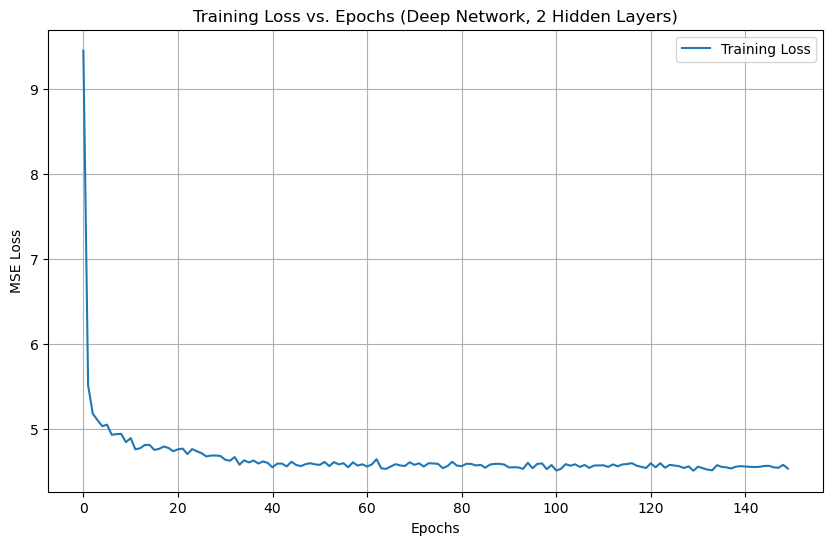

In [47]:
# --- 1b. DeepNN 클래스 구현 (2 Hidden Layers) ---
# 1. 전처리 및 Relu 함수는 동일하므로 생략
# 2. DeepNN 클래스 (2 Hidden Layers)
np.random.seed(42)
class DeepNN:
    def __init__(self, input_size, hidden_size=3, learning_rate=0.001):
        self.lr = learning_rate
        D = input_size
        H = hidden_size

        # He Initialization for weights and zeros for biases(Relu 사용 시 적합하므로)
        # Layer 1: Input -> Hidden1
        self.Omega0 = np.random.randn(H, D) * np.sqrt(2. / D)
        self.beta0 = np.zeros((H, 1))

        # Layer 2: Hidden1 -> Hidden2
        self.Omega1 = np.random.randn(H, H) * np.sqrt(2. / H)
        self.beta1 = np.zeros((H, 1))

        # Layer 3: Hidden2 -> Output
        self.Omega2 = np.random.randn(1, H) * np.sqrt(2. / H)
        self.beta2 = np.zeros((1, 1))

    def forward(self, x):
        # x: (D, 1)
        # Layer 1
        self.z1 = np.dot(self.Omega0, x) + self.beta0
        self.h1 = relu(self.z1)

        # Layer 2
        self.z2 = np.dot(self.Omega1, self.h1) + self.beta1
        self.h2 = relu(self.z2)

        # Output Layer
        self.y_hat = np.dot(self.Omega2, self.h2) + self.beta2
        return self.y_hat

    def compute_loss(self, y_hat, y):
        return np.mean((y_hat - y) ** 2)

    def backward(self, x, y, y_hat):
        # dL/dy_hat
        dy_hat = 2 * (y_hat - y)

        # --- Layer 3 (Output) Gradients ---
        # y_hat = Omega2 * h2 + beta2
        dOmega2 = np.dot(dy_hat, self.h2.T)
        dbeta2 = dy_hat

        # --- Layer 2 (Hidden2) Gradients ---
        # Error signal delta2 propagated from Layer 3
        # dL/dh2 = Omega2.T * dy_hat
        # dL/dz2 = dL/dh2 * ReLU'(z2)
        delta2 = np.dot(self.Omega2.T, dy_hat) * relu_derivative(self.z2)

        dOmega1 = np.dot(delta2, self.h1.T)
        dbeta1 = delta2

        # --- Layer 1 (Hidden1) Gradients ---
        # Error signal delta1 propagated from Layer 2
        # dL/dh1 = Omega1.T * delta2
        # dL/dz1 = dL/dh1 * ReLU'(z1)
        delta1 = np.dot(self.Omega1.T, delta2) * relu_derivative(self.z1)

        dOmega0 = np.dot(delta1, x.T)
        dbeta0 = delta1

        # SGD Update
        self.Omega2 -= self.lr * dOmega2
        self.beta2 -= self.lr * dbeta2
        self.Omega1 -= self.lr * dOmega1
        self.beta1 -= self.lr * dbeta1
        self.Omega0 -= self.lr * dOmega0
        self.beta0 -= self.lr * dbeta0

# --- 3. 학습 실행 ---
X, y = load_and_preprocess_data('/Users/lavi/MLDL_25_2_ASSIGNMENT/ASSIGNMENT_3/Data/CrabAge.csv')
input_dim = X.shape[1]
epochs = 150
learning_rate = 0.001 # 1(a)와 비교를 위해 동일하게 설정 (수렴 여부 확인)

model = DeepNN(input_size=input_dim, hidden_size=3, learning_rate=learning_rate)

loss_history = []
N = X.shape[0]

# Shuffle 시드 고정 (매 에폭마다 동일한 셔플링 순서를 보장하려면 에폭 루프 안에서 seed 설정 필요하나,
# 일반적으로는 초기 seed 고정으로 충분. 여기서는 초기 seed 42로 진행)

print("Deep Network Training Started (SGD)...")
for epoch in range(epochs):
    epoch_loss = 0
    indices = np.arange(N)
    np.random.shuffle(indices)

    for i in indices:
        x_sample = X[i].reshape(-1, 1)
        y_sample = y[i].reshape(-1, 1)

        y_pred = model.forward(x_sample)
        loss = model.compute_loss(y_pred, y_sample)
        epoch_loss += loss

        model.backward(x_sample, y_sample, y_pred)

    avg_loss = epoch_loss / N
    loss_history.append(avg_loss)

    if (epoch + 1) % 15 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss')
plt.title('Training Loss vs. Epochs (Deep Network, 2 Hidden Layers)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.savefig('../Image/1b_deep_network_training_loss.png')
print(f"Final Loss: {loss_history[-1]:.4f}")

--- 1. Shallow Network Training ---
Epoch [20/200] | Train Loss: 4.8793 | Val Loss: 4.7014
Epoch [40/200] | Train Loss: 4.9603 | Val Loss: 4.4741
Epoch [60/200] | Train Loss: 4.8684 | Val Loss: 4.6431
Epoch [80/200] | Train Loss: 4.8629 | Val Loss: 4.5067
Epoch [100/200] | Train Loss: 4.8240 | Val Loss: 4.4905
Epoch [120/200] | Train Loss: 4.8297 | Val Loss: 5.1008
Epoch [140/200] | Train Loss: 4.8055 | Val Loss: 4.5076
Epoch [160/200] | Train Loss: 4.8110 | Val Loss: 4.3875
Epoch [180/200] | Train Loss: 4.8197 | Val Loss: 4.5373
Epoch [200/200] | Train Loss: 4.7566 | Val Loss: 4.3797

--- 2. Deep Network Training ---
Epoch [20/200] | Train Loss: 4.6702 | Val Loss: 4.6763
Epoch [40/200] | Train Loss: 4.5693 | Val Loss: 4.1479
Epoch [60/200] | Train Loss: 4.4935 | Val Loss: 4.3544
Epoch [80/200] | Train Loss: 4.5129 | Val Loss: 4.1219
Epoch [100/200] | Train Loss: 4.4696 | Val Loss: 4.2257
Epoch [120/200] | Train Loss: 4.4822 | Val Loss: 4.2238
Epoch [140/200] | Train Loss: 4.4417 | Val

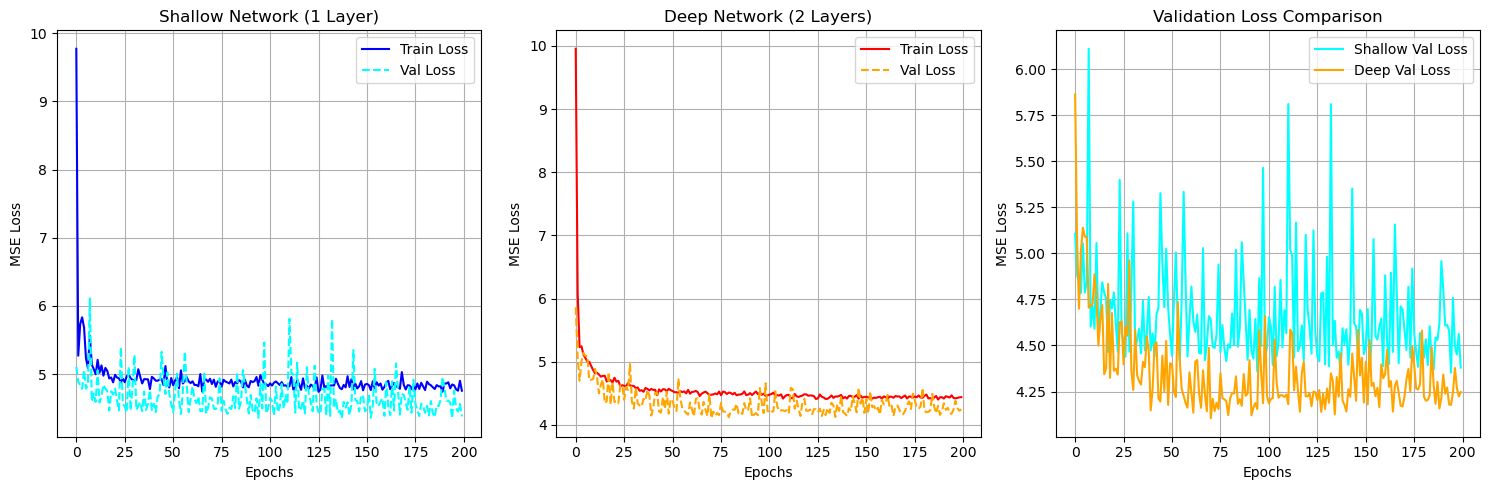


[Conclusion]
Final Shallow Validation Loss: 4.3797
Final Deep Validation Loss: 4.2470


In [48]:
# --- 1c. ShallowNN vs DeepNN 비교 ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 랜덤시드 부여 (재현성 확보)
np.random.seed(42)

#함수명 겹치는 것을 방지하기 위해 1(a), 1(b)의 셀을 그대로 사용하지 않고 해당 셀 내에서 재정의


# 1. 데이터 로드 및 전처리

def load_and_preprocess_data(filepath):
    df = pd.read_csv(filepath)

    # Target(Age)과 Feature 분리
    y = df['Age'].values.reshape(-1, 1)
    X = df.drop('Age', axis=1)

    # 범주형 변수 One-Hot Encoding ('Sex')
    X = pd.get_dummies(X, columns=['Sex'], drop_first=False)

    # 정규화 (StandardScaler)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.values)

    return X_scaled, y


# 2. 공통 활성화 함수

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)


# 3. 모델 클래스 정의 (1(a), 1(b) 내용 통합)


class ShallowNN:
    """1(a) SNN: Input -> Hidden(ReLU) -> Output"""
    def __init__(self, input_size, hidden_size=3, learning_rate=0.001):
        self.lr = learning_rate
        D, H = input_size, hidden_size
        # He Initialization
        self.Omega0 = np.random.randn(H, D) * np.sqrt(2. / D)
        self.beta0 = np.zeros((H, 1))
        self.Omega1 = np.random.randn(1, H) * np.sqrt(2. / H)
        self.beta1 = np.zeros((1, 1))

    def forward(self, x):
        self.z1 = np.dot(self.Omega0, x) + self.beta0
        self.h1 = relu(self.z1)
        self.y_hat = np.dot(self.Omega1, self.h1) + self.beta1
        return self.y_hat

    def compute_loss(self, y_hat, y):
        return np.mean((y_hat - y) ** 2)

    def backward(self, x, y, y_hat):
        dy_hat = 2 * (y_hat - y)
        dOmega1 = np.dot(dy_hat, self.h1.T)
        dbeta1 = dy_hat

        delta1 = np.dot(self.Omega1.T, dy_hat) * relu_derivative(self.z1)
        dOmega0 = np.dot(delta1, x.T)
        dbeta0 = delta1

        self.Omega1 -= self.lr * dOmega1
        self.beta1 -= self.lr * dbeta1
        self.Omega0 -= self.lr * dOmega0
        self.beta0 -= self.lr * dbeta0

class DeepNN:
    """1(b) DNN: Input -> H1(ReLU) -> H2(ReLU) -> Output"""
    def __init__(self, input_size, hidden_size=3, learning_rate=0.0001):
        self.lr = learning_rate
        D, H = input_size, hidden_size
        # He Initialization
        self.Omega0 = np.random.randn(H, D) * np.sqrt(2. / D)
        self.beta0 = np.zeros((H, 1))
        self.Omega1 = np.random.randn(H, H) * np.sqrt(2. / H)
        self.beta1 = np.zeros((H, 1))
        self.Omega2 = np.random.randn(1, H) * np.sqrt(2. / H)
        self.beta2 = np.zeros((1, 1))

    def forward(self, x):
        self.z1 = np.dot(self.Omega0, x) + self.beta0
        self.h1 = relu(self.z1)
        self.z2 = np.dot(self.Omega1, self.h1) + self.beta1
        self.h2 = relu(self.z2)
        self.y_hat = np.dot(self.Omega2, self.h2) + self.beta2
        return self.y_hat

    def compute_loss(self, y_hat, y):
        return np.mean((y_hat - y) ** 2)

    def backward(self, x, y, y_hat):
        dy_hat = 2 * (y_hat - y)

        # Output Layer
        dOmega2 = np.dot(dy_hat, self.h2.T)
        dbeta2 = dy_hat

        # Hidden 2
        delta2 = np.dot(self.Omega2.T, dy_hat) * relu_derivative(self.z2)
        dOmega1 = np.dot(delta2, self.h1.T)
        dbeta1 = delta2

        # Hidden 1
        delta1 = np.dot(self.Omega1.T, delta2) * relu_derivative(self.z1)
        dOmega0 = np.dot(delta1, x.T)
        dbeta0 = delta1

        # Update
        self.Omega2 -= self.lr * dOmega2
        self.beta2 -= self.lr * dbeta2
        self.Omega1 -= self.lr * dOmega1
        self.beta1 -= self.lr * dbeta1
        self.Omega0 -= self.lr * dOmega0
        self.beta0 -= self.lr * dbeta0


# 4. Training & Validation

def train_and_validate(model, X_train, y_train, X_val, y_val, epochs):
    train_losses = []
    val_losses = []

    N_train = X_train.shape[0]
    N_val = X_val.shape[0]

    for epoch in range(epochs):
        # --- Training Phase ---
        train_epoch_loss = 0
        indices = np.arange(N_train)
        np.random.shuffle(indices) # SGD Shuffle

        for i in indices:
            x_s = X_train[i].reshape(-1, 1)
            y_s = y_train[i].reshape(-1, 1)

            # Forward -> Loss -> Backward -> Update
            y_pred = model.forward(x_s)
            loss = model.compute_loss(y_pred, y_s)
            train_epoch_loss += loss
            model.backward(x_s, y_s, y_pred)

        train_losses.append(train_epoch_loss / N_train)

        # --- Validation Phase ---
        val_epoch_loss = 0
        # 검증 시에는 Shuffle 불필요, Backward 생략
        for i in range(N_val):
            x_v = X_val[i].reshape(-1, 1)
            y_v = y_val[i].reshape(-1, 1)

            # Only Forward -> Loss
            y_pred_val = model.forward(x_v)
            loss_val = model.compute_loss(y_pred_val, y_v)
            val_epoch_loss += loss_val

        val_losses.append(val_epoch_loss / N_val)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")

    return train_losses, val_losses


# 5. Execution: Shallow vs Deep Network Comparison

if __name__ == "__main__":
    X, y = load_and_preprocess_data('/Users/lavi/MLDL_25_2_ASSIGNMENT/ASSIGNMENT_3/Data/CrabAge.csv')

    # 1(c) 핵심: Train / Validation 분할 (80:20)
    # random_state=42로 고정하여 항상 같은 데이터셋으로 비교
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    input_dim = X.shape[1]
    epochs = 200

    print("--- 1. Shallow Network Training ---")
    # Shallow Network: 학습률 0.001
    shallow_model = ShallowNN(input_dim, hidden_size=3, learning_rate=0.001)
    s_train_loss, s_val_loss = train_and_validate(shallow_model, X_train, y_train, X_val, y_val, epochs)

    print("\n--- 2. Deep Network Training ---")
    # Deep Network: 학습률 0.001로 하여 동일성 부여
    deep_model = DeepNN(input_dim, hidden_size=3, learning_rate=0.001)
    d_train_loss, d_val_loss = train_and_validate(deep_model, X_train, y_train, X_val, y_val, epochs)


    # 6. 결과 시각화 (Comparison Plots)

    plt.figure(figsize=(15, 5))

    # Plot 1: Shallow Network Train vs Val
    plt.subplot(1, 3, 1)
    plt.plot(s_train_loss, label='Train Loss', color='blue')
    plt.plot(s_val_loss, label='Val Loss', color='cyan', linestyle='--')
    plt.title('Shallow Network (1 Layer)')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

    # Plot 2: Deep Network Train vs Val
    plt.subplot(1, 3, 2)
    plt.plot(d_train_loss, label='Train Loss', color='red')
    plt.plot(d_val_loss, label='Val Loss', color='orange', linestyle='--')
    plt.title('Deep Network (2 Layers)')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

    # Plot 3: Shallow Val vs Deep Val (모델 간 성능 비교)
    plt.subplot(1, 3, 3)
    plt.plot(s_val_loss, label='Shallow Val Loss', color='cyan')
    plt.plot(d_val_loss, label='Deep Val Loss', color='orange')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('../Image/1c_comparison_results.png')
    plt.show()

    print("\n[Conclusion]")
    print(f"Final Shallow Validation Loss: {s_val_loss[-1]:.4f}")
    print(f"Final Deep Validation Loss: {d_val_loss[-1]:.4f}")

##Problem 2##

Vanilla SGD DNN Training[Train Loss | Val Loss]...
Epoch [10/100] Train Loss: 0.0093, Val Loss: 0.0106
Epoch [20/100] Train Loss: 0.0055, Val Loss: 0.0064
Epoch [30/100] Train Loss: 0.0045, Val Loss: 0.0057
Epoch [40/100] Train Loss: 0.0039, Val Loss: 0.0053
Epoch [50/100] Train Loss: 0.0035, Val Loss: 0.0049
Epoch [60/100] Train Loss: 0.0032, Val Loss: 0.0048
Epoch [70/100] Train Loss: 0.0029, Val Loss: 0.0044
Epoch [80/100] Train Loss: 0.0027, Val Loss: 0.0045
Epoch [90/100] Train Loss: 0.0026, Val Loss: 0.0043
Epoch [100/100] Train Loss: 0.0024, Val Loss: 0.0042


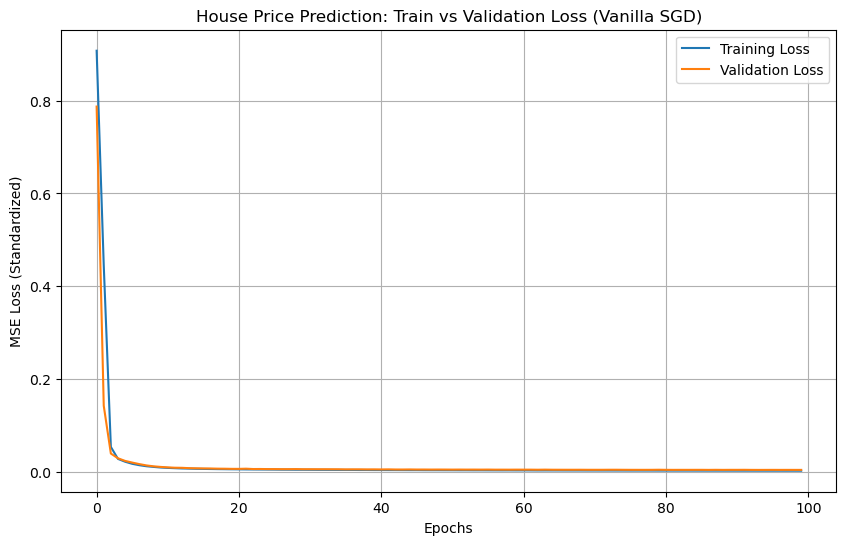

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 1. 재현성 위한 랜덤 시드 고정
torch.manual_seed(42)
np.random.seed(42)


# 2. 데이터 로드 및 전처리
def load_house_data(filepath):
    df = pd.read_csv(filepath)

    # Target(House Price)과 Feature(House Price 제외) 분리
    y = df['House_Price'].values.reshape(-1, 1)
    X = df.drop('House_Price', axis=1).values

    # Train/Validation 분할 (80:20)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # 정규화 (Standardization)
    # X와 y 모두 스케일링 진행 (회귀 문제에서 y 스케일링은 수렴에 도움됨)
    scaler_x = StandardScaler()
    X_train = scaler_x.fit_transform(X_train)
    X_val = scaler_x.transform(X_val)

    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_val = scaler_y.transform(y_val)

    # Tensor 변환
    X_train_t = torch.FloatTensor(X_train)
    y_train_t = torch.FloatTensor(y_train)
    X_val_t = torch.FloatTensor(X_val)
    y_val_t = torch.FloatTensor(y_val)

    return X_train_t, y_train_t, X_val_t, y_val_t


# 3. 모델 정의 (PyTorch)
class DeepHouseNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepHouseNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64), # Layer 1
            nn.ReLU(),
            nn.Linear(64, 64),        # Layer 2
            nn.ReLU(),
            nn.Linear(64, 64),        # Layer 3
            nn.ReLU(),
            nn.Linear(64, 1)          # Output Layer
        )

    def forward(self, x):
        return self.model(x)


# 4. 학습 및 평가용 함수 정의

def train_model(model, train_loader, X_val, y_val, epochs=100, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    print(f"Vanilla SGD DNN Training[Train Loss | Val Loss]...")

    for epoch in range(epochs):
        model.train() # 학습 모드
        epoch_loss = 0

        for batch_x, batch_y in train_loader:
            # 1. Forward
            pred = model(batch_x)
            loss = criterion(pred, batch_y)

            # 2. Backward & Update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Average Train Loss
        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val).item()
            val_losses.append(val_loss)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses


# 5. 메인 실행 코드

if __name__ == "__main__":
    X_train, y_train, X_val, y_val = load_house_data('/Users/lavi/MLDL_25_2_ASSIGNMENT/ASSIGNMENT_3/Data/HousePrice.csv')

    # DataLoader 생성 (Batch Size = 1 for Vanilla SGD)
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

    # 모델 초기화
    input_dim = X_train.shape[1]
    model = DeepHouseNet(input_dim)

    # 학습 실행
    train_losses, val_losses = train_model(model, train_loader, X_val, y_val, epochs=100, lr=0.001)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('House Price Prediction: Train vs Validation Loss (Vanilla SGD)')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss (Standardized)')
    plt.legend()
    plt.grid(True)
    plt.savefig('../Image/2a_house_price_loss.png')

Full-batch GD...
Mini-batch SGD...
Adam...

[Final Validation Loss]
Full-batch GD: 0.9779
Mini-batch SGD: 0.0251
Adam: 0.0046


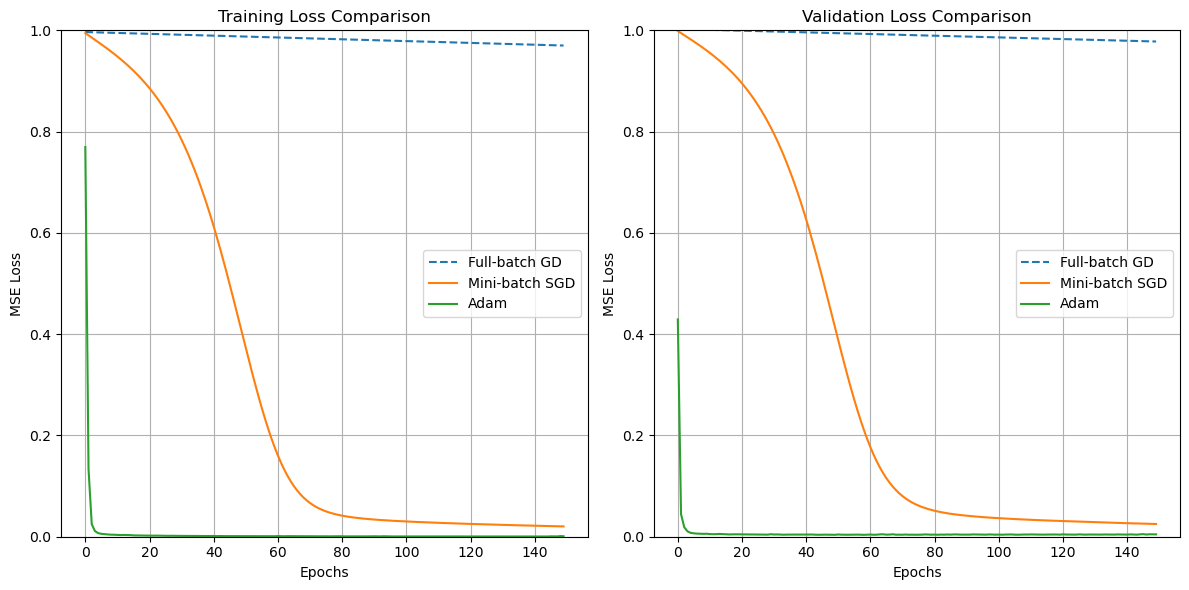

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 1. 재현성 위한 랜덤 시드 고정
def set_seed(seed):
    np.random.seed(42)
    torch.manual_seed(42)

def load_house_data(filepath):
    df = pd.read_csv(filepath)
    y = df['House_Price'].values.reshape(-1, 1)
    X = df.drop('House_Price', axis=1).values

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler_x = StandardScaler()
    X_train = scaler_x.fit_transform(X_train)
    X_val = scaler_x.transform(X_val)

    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_val = scaler_y.transform(y_val)

    X_train_t = torch.FloatTensor(X_train)
    y_train_t = torch.FloatTensor(y_train)
    X_val_t = torch.FloatTensor(X_val)
    y_val_t = torch.FloatTensor(y_val)

    return X_train_t, y_train_t, X_val_t, y_val_t


# 2. 모델 정의 (2(a)와 동일)

class DeepHouseNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepHouseNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)


# 3. 학습 함수 (Generic)

def train_experiment(model, loader, optimizer, X_val, y_val, epochs):
    criterion = nn.MSELoss()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        num_batches = 0

        for batch_x, batch_y in loader:
            optimizer.zero_grad()
            pred = model(batch_x)
            loss = criterion(pred, batch_y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            num_batches += 1

        train_losses.append(epoch_loss / num_batches)

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val).item()
            val_losses.append(val_loss)

    return train_losses, val_losses


# 4. 메인 실행: 3가지 옵티마이저(FGD, MSGD, Adam) 비교

if __name__ == "__main__":
    set_seed(42)
    X_train, y_train, X_val, y_val = load_house_data('/Users/lavi/MLDL_25_2_ASSIGNMENT/ASSIGNMENT_3/Data/HousePrice.csv')

    input_dim = X_train.shape[1]
    epochs = 150
    lr = 0.001 # 모든 옵티마이저에 동일하게 적용할 학습률


    train_dataset = TensorDataset(X_train, y_train)
    N = len(train_dataset)

    # --- Experiment 1: Full-batch GD ---
    print("Full-batch GD...")
    set_seed(42) # 모델 초기화 동일하게
    model_gd = DeepHouseNet(input_dim)
    loader_gd = DataLoader(train_dataset, batch_size=N, shuffle=False) # Batch size = Entire Data
    opt_gd = optim.SGD(model_gd.parameters(), lr=lr)

    train_loss_gd, val_loss_gd = train_experiment(model_gd, loader_gd, opt_gd, X_val, y_val, epochs)

    # --- Experiment 2: Mini-batch SGD (Batch 32) ---
    print("Mini-batch SGD...")
    set_seed(42) # 모델 초기화 동일하게
    model_sgd = DeepHouseNet(input_dim)
    loader_sgd = DataLoader(train_dataset, batch_size=32, shuffle=True) # Batch size = 32
    opt_sgd = optim.SGD(model_sgd.parameters(), lr=lr)

    train_loss_sgd, val_loss_sgd = train_experiment(model_sgd, loader_sgd, opt_sgd, X_val, y_val, epochs)

    # --- Experiment 3: Adam (Batch 32) ---
    print("Adam...")
    set_seed(42) # 모델 초기화 동일하게
    model_adam = DeepHouseNet(input_dim)
    # Adam도 일반적으로 Mini-batch로 학습함
    loader_adam = DataLoader(train_dataset, batch_size=32, shuffle=True)
    opt_adam = optim.Adam(model_adam.parameters(), lr=lr) # Default betas=(0.9, 0.999) used

    train_loss_adam, val_loss_adam = train_experiment(model_adam, loader_adam, opt_adam, X_val, y_val, epochs)


    # 5. 결과 시각화

    plt.figure(figsize=(12, 6))

    # Training Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_gd, label='Full-batch GD', linestyle='--')
    plt.plot(train_loss_sgd, label='Mini-batch SGD')
    plt.plot(train_loss_adam, label='Adam')
    plt.title('Training Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.0) # 스케일 조정

    # Validation Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(val_loss_gd, label='Full-batch GD', linestyle='--')
    plt.plot(val_loss_sgd, label='Mini-batch SGD')
    plt.plot(val_loss_adam, label='Adam')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.0) # 스케일 조정

    plt.tight_layout()
    plt.savefig('../Image/2b_optimizer_comparison.png')


    print("\n[Final Validation Loss]")
    print(f"Full-batch GD: {val_loss_gd[-1]:.4f}")
    print(f"Mini-batch SGD: {val_loss_sgd[-1]:.4f}")
    print(f"Adam: {val_loss_adam[-1]:.4f}")

Lambda = 0...
Lambda = 0.0001...
Lambda = 0.001...
Lambda = 0.01...

[Final Training MSE]
Lambda 0: 0.0010
Lambda 0.0001: 0.0014
Lambda 0.001: 0.0017
Lambda 0.01: 0.0037

[Final Validation MSE]
Lambda 0: 0.0046
Lambda 0.0001: 0.0038
Lambda 0.001: 0.0022
Lambda 0.01: 0.0035


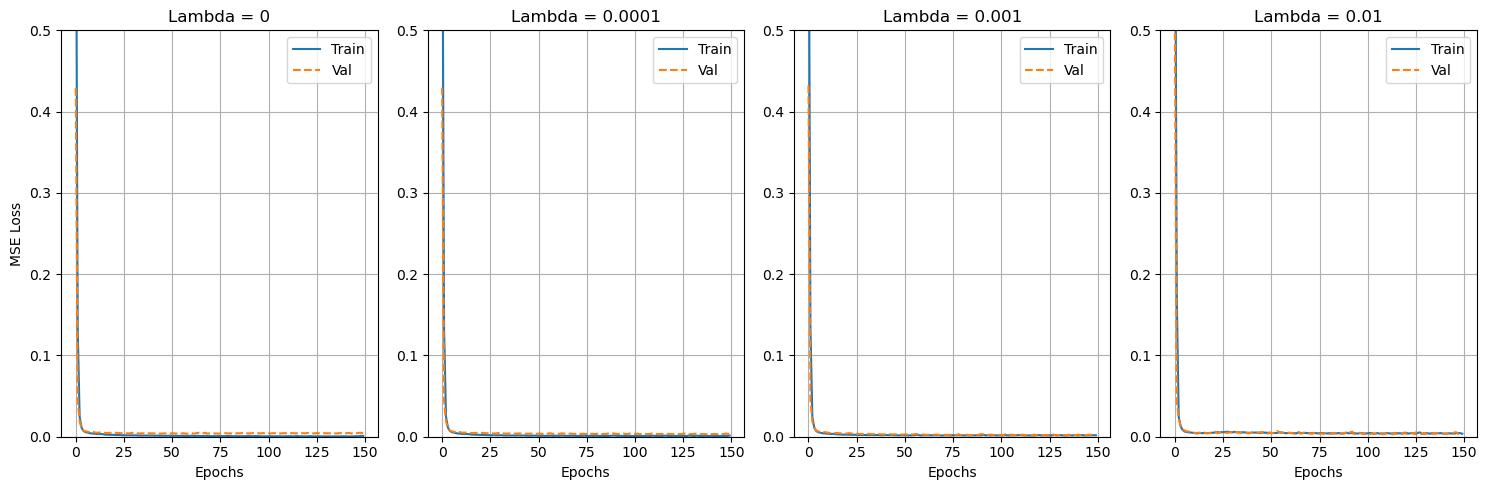

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 1. 재현성 위한 랜덤 시드 고정 및 데이터 로드

def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)


def load_house_data(filepath):
    df = pd.read_csv(filepath)
    y = df['House_Price'].values.reshape(-1, 1)
    X = df.drop('House_Price', axis=1).values

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler_x = StandardScaler()
    X_train = scaler_x.fit_transform(X_train)
    X_val = scaler_x.transform(X_val)

    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_val = scaler_y.transform(y_val)

    return torch.FloatTensor(X_train), torch.FloatTensor(y_train), \
           torch.FloatTensor(X_val), torch.FloatTensor(y_val)

# 2. 모델 정의 (2(a)와 동일)

class DeepHouseNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepHouseNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)


# 3. L2 Regularization 학습 함수

def train_with_l2(model, loader, X_val, y_val, epochs, lambda_reg, lr=0.001):
    criterion = nn.MSELoss()
    # Optimizer에는 weight_decay를 0으로 설정 (수동 구현을 위해)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        num_batches = 0

        for batch_x, batch_y in loader:
            optimizer.zero_grad()
            pred = model(batch_x)

            # 1. 기본 MSE Loss 계산
            mse_loss = criterion(pred, batch_y)

            # 2. L2 Penalty 계산 (수동 구현)
            # sum( w^2 ) for all weights
            l2_reg = torch.tensor(0.)
            for param in model.parameters():
                l2_reg += torch.norm(param) ** 2

            # 3. 최종 Loss = MSE + lambda * L2
            total_loss = mse_loss + lambda_reg * l2_reg

            total_loss.backward()
            optimizer.step()

            epoch_loss += mse_loss.item() # 순수 MSE만 기록함(비교를 위해)
            num_batches += 1

        train_losses.append(epoch_loss / num_batches)

        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val).item()
            val_losses.append(val_loss)

    return train_losses, val_losses


# 4. Execution: Lambda 값 변화에 따른 비교

if __name__ == "__main__":
    set_seed(42)
    X_train, y_train, X_val, y_val = load_house_data('/Users/lavi/MLDL_25_2_ASSIGNMENT/ASSIGNMENT_3/Data/HousePrice.csv')

    input_dim = X_train.shape[1]
    epochs = 150
    lr = 0.001

    # DataLoader (Batch Size 32 for Adam)
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    lambdas = [0, 1e-4, 1e-3, 1e-2]
    results = {}

    plt.figure(figsize=(15, 5))

    for i, lam in enumerate(lambdas):
        print(f"Lambda = {lam}...")

        # 매번 모델 초기화
        set_seed(42)
        model = DeepHouseNet(input_dim)

        t_loss, v_loss = train_with_l2(model, train_loader, X_val, y_val, epochs, lam, lr)
        results[lam] = (t_loss, v_loss)


        plt.subplot(1, 4, i+1)
        plt.plot(t_loss, label='Train')
        plt.plot(v_loss, label='Val', linestyle='--')
        plt.title(f'Lambda = {lam}')
        plt.xlabel('Epochs')
        if i == 0: plt.ylabel('MSE Loss')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 0.5) # 비교를 위해 y축 고정

    plt.tight_layout()
    plt.savefig('../Image/2c_regularization_comparison.png')


    # 최종 결과 출력
    print("\n[Final Training MSE]")
    for lam in lambdas:
        print(f"Lambda {lam}: {results[lam][0][-1]:.4f}")

    print("\n[Final Validation MSE]")
    for lam in lambdas:
        print(f"Lambda {lam}: {results[lam][1][-1]:.4f}")